# Lab Assignment - 6

Train the following Recurrent Neural Networks for the MNIST dataset (digits 0–1) using TensorFlow-Keras and PyTorch.
 Train the RNN model by passing the image as a one-dimensional array. Experiment with various learning rates and try to invoke the vanishing and exploding gradient problems
Train such that each row in the image is considered as an input sequence (sequence length = 28)
Train such that an entire image is considered as an input sequence (sequence length = 784)
Train an RNN for the Kaggle sunspot dataset. Try out various sequence lengths, such as bi-monthly, quarterly, yearly, and so on.
For each method and framework, plot loss and accuracy at the end. Train for a varying number of epochs.

## Tensorflow - Keras Implementation

In [4]:
!pip install tensorflow

Epoch 1/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 32s 155ms/step - accuracy: 0.4896 - loss: 0.7715 - val_accuracy: 0.5366 - val_loss: 0.6907
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 29s 145ms/step - accuracy: 0.5215 - loss: 0.6971 - val_accuracy: 0.4634 - val_loss: 0.7133
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 29s 147ms/step - accuracy: 0.4956 - loss: 0.7075 - val_accuracy: 0.5366 - val_loss: 0.7481
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 25s 125ms/step - accuracy: 0.5047 - loss: 0.7026 - val_accuracy: 0.5366 - val_loss: 0.6937
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 25s 127ms/step - accuracy: 0.5137 - loss: 0.7118 - val_accuracy: 0.4634 - val_loss: 0.7191


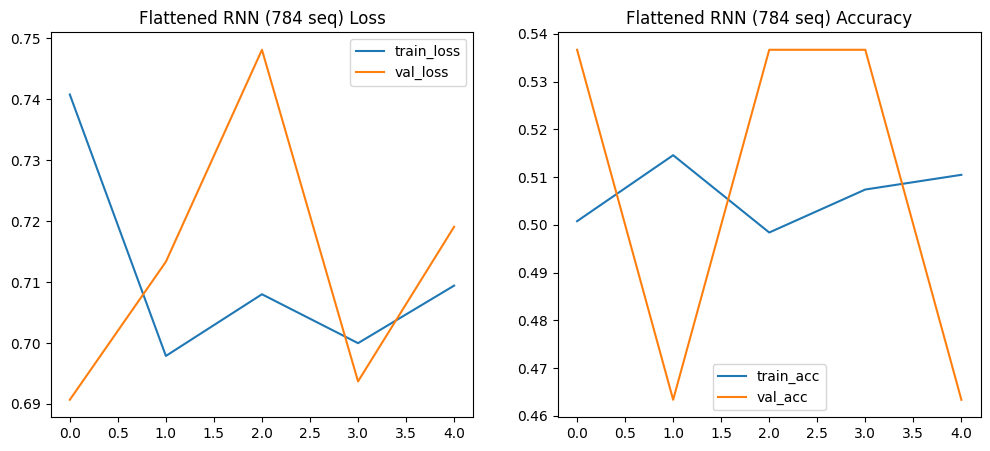

Epoch 1/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9772 - loss: 0.0743 - val_accuracy: 0.9986 - val_loss: 0.0046
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9969 - loss: 0.0111 - val_accuracy: 0.9920 - val_loss: 0.0274
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9971 - loss: 0.0102 - val_accuracy: 0.9986 - val_loss: 0.0067
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9967 - loss: 0.0106 - val_accuracy: 0.9976 - val_loss: 0.0074
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9994 - loss: 0.0053 - val_accuracy: 0.9995 - val_loss: 0.0024


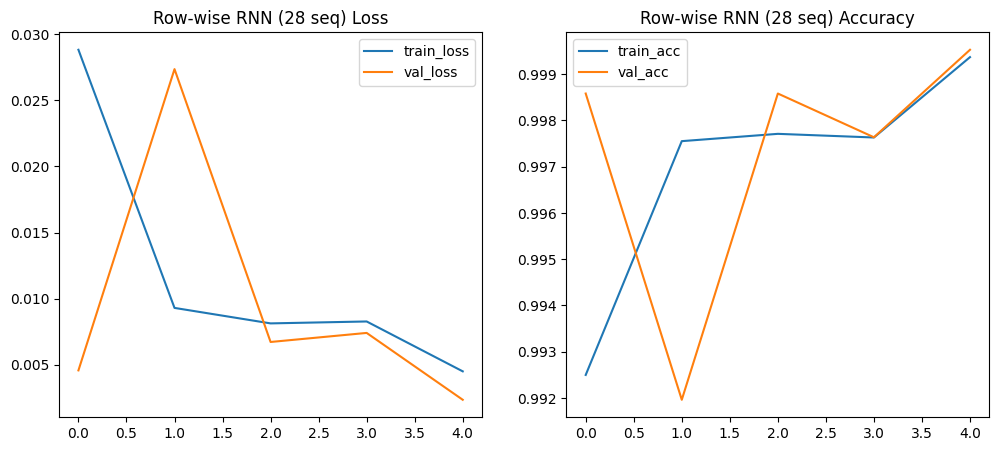

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST & keep only digits 0 and 1
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

x_train, x_test = x_train / 255.0, x_test / 255.0

# -------------------------------
# 1. Image as 1D (flattened 784 sequence)
# -------------------------------
def rnn_flattened(lr=0.001):
    model = models.Sequential([
        layers.SimpleRNN(128, input_shape=(784,1), activation='tanh'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# -------------------------------
# 2. Row-wise (28 sequences of 28 pixels)
# -------------------------------
def rnn_rowwise(lr=0.001):
    model = models.Sequential([
        layers.SimpleRNN(128, input_shape=(28,28), activation='tanh'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Training helper
def train_and_plot(model, x_train, y_train, x_test, y_test, name, epochs=5):
    history = model.fit(x_train, y_train, epochs=epochs,
                        validation_data=(x_test, y_test), batch_size=64)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f"{name} Loss")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title(f"{name} Accuracy")
    plt.legend()
    plt.show()

# Reshape data for each experiment
x_train_flat = x_train.reshape(-1, 784, 1)
x_test_flat = x_test.reshape(-1, 784, 1)

x_train_row = x_train
x_test_row = x_test

# Run training
train_and_plot(rnn_flattened(lr=0.01), x_train_flat, y_train, x_test_flat, y_test, "Flattened RNN (784 seq)", epochs=5)
train_and_plot(rnn_rowwise(lr=0.001), x_train_row, y_train, x_test_row, y_test, "Row-wise RNN (28 seq)", epochs=5)


## Pytorch Implementation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Prepare binary MNIST (0 vs 1)
train_mask = (y_train == 0) | (y_train == 1)
test_mask = (y_test == 0) | (y_test == 1)

X_train_torch = torch.tensor(x_train[train_mask], dtype=torch.float32)
y_train_torch = torch.tensor(y_train[train_mask], dtype=torch.long)
X_test_torch = torch.tensor(x_test[test_mask], dtype=torch.float32)
y_test_torch = torch.tensor(y_test[test_mask], dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_torch, y_train_torch), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_torch, y_test_torch), batch_size=64)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------------------
# 1. Flattened 784-sequence RNN
# -------------------------------
class RNN_Flatten(nn.Module):
    def __init__(self, hidden_size=128):
        super(RNN_Flatten, self).__init__()
        self.rnn = nn.RNN(1, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 2)

    def forward(self, x):
        x = x.view(-1, 784, 1) # flatten
        out, _ = self.rnn(x)
        return self.fc(out[:,-1,:])

# -------------------------------
# 2. Row-wise 28-sequence RNN
# -------------------------------
class RNN_Rowwise(nn.Module):
    def __init__(self, hidden_size=128):
        super(RNN_Rowwise, self).__init__()
        self.rnn = nn.RNN(28, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 2)

    def forward(self, x):
        out, _ = self.rnn(x)  # already (batch, 28, 28)
        return self.fc(out[:,-1,:])

# Training helper
def train_model(model, loader, test_loader, name, epochs=5, lr=0.001):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, test_losses, train_acc, test_acc = [], [], [], []

    for epoch in range(epochs):
        model.train()
        total, correct, loss_sum = 0, 0, 0
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            loss_sum += loss.item()
            _, pred = out.max(1)
            total += y.size(0)
            correct += pred.eq(y).sum().item()
        train_losses.append(loss_sum / len(loader))
        train_acc.append(correct / total)

        # Test
        model.eval()
        total, correct, loss_sum = 0, 0, 0
        with torch.no_grad():
            for x, y in test_loader:
                x, y = x.to(device), y.to(device)
                out = model(x)
                loss = criterion(out, y)
                loss_sum += loss.item()
                _, pred = out.max(1)
                total += y.size(0)
                correct += pred.eq(y).sum().item()
        test_losses.append(loss_sum / len(test_loader))
        test_acc.append(correct / total)

        print(f"Epoch {epoch+1}/{epochs} | Train Acc: {train_acc[-1]:.2f} | Test Acc: {test_acc[-1]:.2f}")

    # Plot
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(train_losses, label="train_loss")
    plt.plot(test_losses, label="test_loss")
    plt.title(f"{name} Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(train_acc, label="train_acc")
    plt.plot(test_acc, label="test_acc")
    plt.title(f"{name} Accuracy")
    plt.legend()
    plt.show()

# Run training
train_model(RNN_Flatten(), train_loader, test_loader, "RNN Flattened (PyTorch)", epochs=5, lr=0.01)
train_model(RNN_Rowwise(), train_loader, test_loader, "RNN Rowwise (PyTorch)", epochs=5, lr=0.001)

Epoch 1/5 | Train Acc: 0.51 | Test Acc: 0.54
Epoch 2/5 | Train Acc: 0.50 | Test Acc: 0.54


## Tensorflow : Sunspot Dataset

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load sunspot dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"
df = pd.read_csv(url, usecols=[1])  # monthly sunspot counts
values = df.values.astype("float32")

# Normalize
scaler = MinMaxScaler()
values = scaler.fit_transform(values)

# Create sequences
def create_dataset(data, seq_length=12):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 24  # e.g., bi-monthly (24 months)
X, y = create_dataset(values, seq_length)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# RNN model
model = models.Sequential([
    layers.SimpleRNN(50, activation='tanh', input_shape=(seq_length,1)),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.title("Sunspot RNN Loss")
plt.legend()
plt.show()
